In [1]:
import matplotlib.pyplot as plt
import pandas as pd

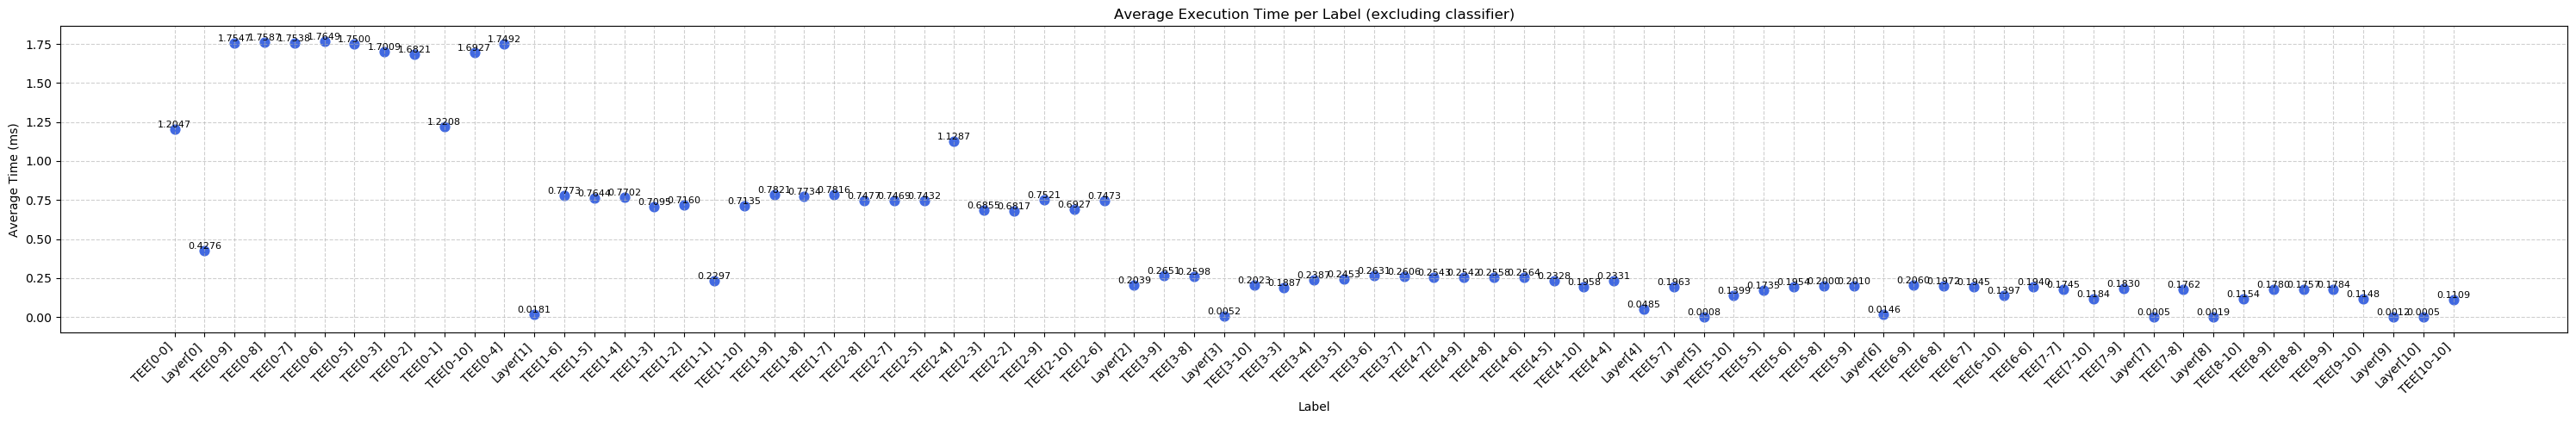

In [6]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# CSV 폴더 경로
csv_dir = "/home/avees/tee/output/layer_time"

# 라벨별 합계, 개수 누적용 딕셔너리
sum_dict = {}
count_dict = {}

# 디렉토리 내 모든 CSV 파일 순회
for filename in sorted(os.listdir(csv_dir)):
    if filename.endswith(".csv"):
        csv_path = os.path.join(csv_dir, filename)
        df = pd.read_csv(csv_path)

        # 숫자형 컬럼만 선택
        numeric_df = df.select_dtypes(include=['number'])

        # classifier 컬럼 제외
        if "classifier" in numeric_df.columns:
            numeric_df = numeric_df.drop(columns=["classifier"])

        # 앞 5행 제외 후 평균 계산
        numeric_df = numeric_df[5:]
        col_means = numeric_df.mean()

        # 각 라벨별 합계 및 개수 누적
        for col, val in col_means.items():
            if pd.isna(val):
                continue
            sum_dict[col] = sum_dict.get(col, 0) + val
            count_dict[col] = count_dict.get(col, 0) + 1

# 최종 평균 계산
final_means = {col: sum_dict[col] / count_dict[col] for col in sum_dict}

# DataFrame으로 변환
result_df = pd.DataFrame(list(final_means.items()), columns=["Label", "Mean"])

# 숫자 정렬 (레이어 이름에 숫자 포함 시)
def extract_num(label):
    match = re.search(r'\d+', label)
    return int(match.group()) if match else 0

result_df["num"] = result_df["Label"].apply(extract_num)
result_df = result_df.sort_values(by="num").drop(columns=["num"])

# 점 그래프 (scatter) 그리기
plt.figure(figsize=(30, 5))
plt.scatter(result_df["Label"], result_df["Mean"], color="royalblue", s=60)

# 각 점에 평균값 표시
for x, y in zip(result_df["Label"], result_df["Mean"]):
    plt.text(x, y, f"{y:.4f}", fontsize=8, ha='center', va='bottom')

plt.title("Average Execution Time per Label (excluding classifier)")
plt.xlabel("Label")
plt.ylabel("Average Time (ms)")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


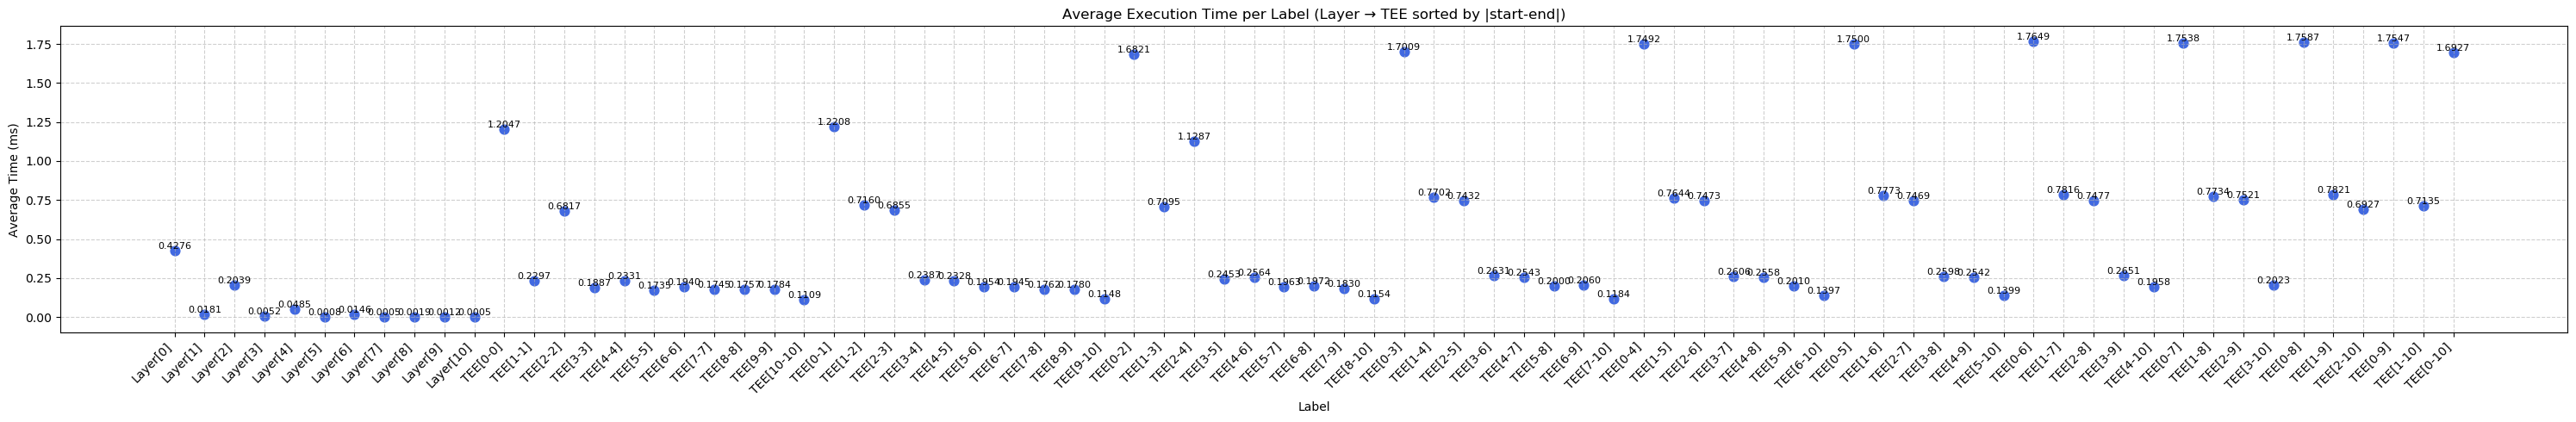

In [8]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# CSV 폴더 경로
csv_dir = "/home/avees/tee/output/layer_time"

# 라벨별 합계, 개수 누적용 딕셔너리
sum_dict = {}
count_dict = {}

# 디렉토리 내 모든 CSV 파일 순회
for filename in sorted(os.listdir(csv_dir)):
    if filename.endswith(".csv"):
        csv_path = os.path.join(csv_dir, filename)
        df = pd.read_csv(csv_path)

        # 숫자형 컬럼만 선택
        numeric_df = df.select_dtypes(include=['number'])

        # classifier 컬럼 제외
        if "classifier" in numeric_df.columns:
            numeric_df = numeric_df.drop(columns=["classifier"])

        # 앞 5행 제외 후 평균 계산
        numeric_df = numeric_df[5:]
        col_means = numeric_df.mean()

        # 각 라벨별 합계 및 개수 누적
        for col, val in col_means.items():
            if pd.isna(val):
                continue
            sum_dict[col] = sum_dict.get(col, 0) + val
            count_dict[col] = count_dict.get(col, 0) + 1

# 최종 평균 계산
final_means = {col: sum_dict[col] / count_dict[col] for col in sum_dict}

# DataFrame 변환
result_df = pd.DataFrame(list(final_means.items()), columns=["Label", "Mean"])

# 정렬 기준 함수 정의
def sort_key(label):
    # 1️⃣ Layer[...] → 숫자 기준
    if label.startswith("Layer"):
        match = re.search(r'\d+', label)
        num = int(match.group()) if match else 0
        return (0, num, 0)

    # 2️⃣ TEE[...] → start, end 숫자 차이 기준
    elif label.startswith("TEE"):
        nums = re.findall(r'\d+', label)
        if len(nums) >= 2:
            start, end = int(nums[0]), int(nums[1])
        elif len(nums) == 1:
            start, end = int(nums[0]), int(nums[0])
        else:
            start, end = 0, 0
        diff = abs(start - end)
        return (1, diff, start * 100 + end)  # diff가 같으면 start,end 순서로

    # 3️⃣ 기타는 마지막
    else:
        return (2, 9999, 9999)

# 정렬 적용
result_df["sort_key"] = result_df["Label"].apply(sort_key)
result_df = result_df.sort_values(by="sort_key").drop(columns=["sort_key"])

# 점 그래프 (scatter) 그리기
plt.figure(figsize=(30, 5))
plt.scatter(result_df["Label"], result_df["Mean"], color="royalblue", s=60)

# 각 점에 평균값 표시
for x, y in zip(result_df["Label"], result_df["Mean"]):
    plt.text(x, y, f"{y:.4f}", fontsize=8, ha='center', va='bottom')

plt.title("Average Execution Time per Label (Layer → TEE sorted by |start-end|)")
plt.xlabel("Label")
plt.ylabel("Average Time (ms)")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/tmp/ipykernel_29314/3356654175.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["sort_key"] = filtered_df["Label"].apply(sort_key)


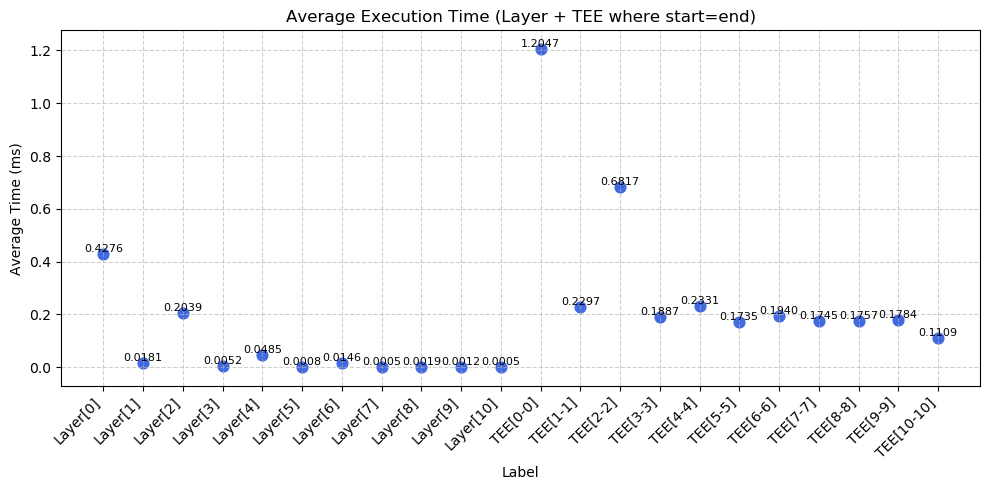

In [9]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# CSV 폴더 경로
csv_dir = "/home/avees/tee/output/layer_time"

# 라벨별 합계, 개수 누적용 딕셔너리
sum_dict = {}
count_dict = {}

# 디렉토리 내 모든 CSV 파일 순회
for filename in sorted(os.listdir(csv_dir)):
    if filename.endswith(".csv"):
        csv_path = os.path.join(csv_dir, filename)
        df = pd.read_csv(csv_path)

        # 숫자형 컬럼만 선택
        numeric_df = df.select_dtypes(include=['number'])

        # classifier 컬럼 제외
        if "classifier" in numeric_df.columns:
            numeric_df = numeric_df.drop(columns=["classifier"])

        # 앞 5행 제외 후 평균 계산
        numeric_df = numeric_df[5:]
        col_means = numeric_df.mean()

        # 각 라벨별 합계 및 개수 누적
        for col, val in col_means.items():
            if pd.isna(val):
                continue
            sum_dict[col] = sum_dict.get(col, 0) + val
            count_dict[col] = count_dict.get(col, 0) + 1

# 최종 평균 계산
final_means = {col: sum_dict[col] / count_dict[col] for col in sum_dict}

# DataFrame 변환
result_df = pd.DataFrame(list(final_means.items()), columns=["Label", "Mean"])

# ✅ Layer 또는 TEE(start == end)만 필터링
def is_valid_label(label):
    if label.startswith("Layer"):
        return True
    if label.startswith("TEE"):
        nums = re.findall(r'\d+', label)
        if len(nums) >= 2 and int(nums[0]) == int(nums[1]):
            return True
    return False

filtered_df = result_df[result_df["Label"].apply(is_valid_label)]

# 정렬 기준 (Layer → TEE)
def sort_key(label):
    if label.startswith("Layer"):
        match = re.search(r'\d+', label)
        num = int(match.group()) if match else 0
        return (0, num)
    elif label.startswith("TEE"):
        nums = re.findall(r'\d+', label)
        a = int(nums[0]) if len(nums) >= 1 else 0
        return (1, a)
    else:
        return (2, 0)

filtered_df["sort_key"] = filtered_df["Label"].apply(sort_key)
filtered_df = filtered_df.sort_values(by="sort_key").drop(columns=["sort_key"])

# 🎯 점 그래프 (scatter)
plt.figure(figsize=(10, 5))
plt.scatter(filtered_df["Label"], filtered_df["Mean"], color="royalblue", s=60)

# 각 점에 평균값 표시
for x, y in zip(filtered_df["Label"], filtered_df["Mean"]):
    plt.text(x, y, f"{y:.4f}", fontsize=8, ha='center', va='bottom')

plt.title("Average Execution Time (Layer + TEE where start=end)")
plt.xlabel("Label")
plt.ylabel("Average Time (ms)")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


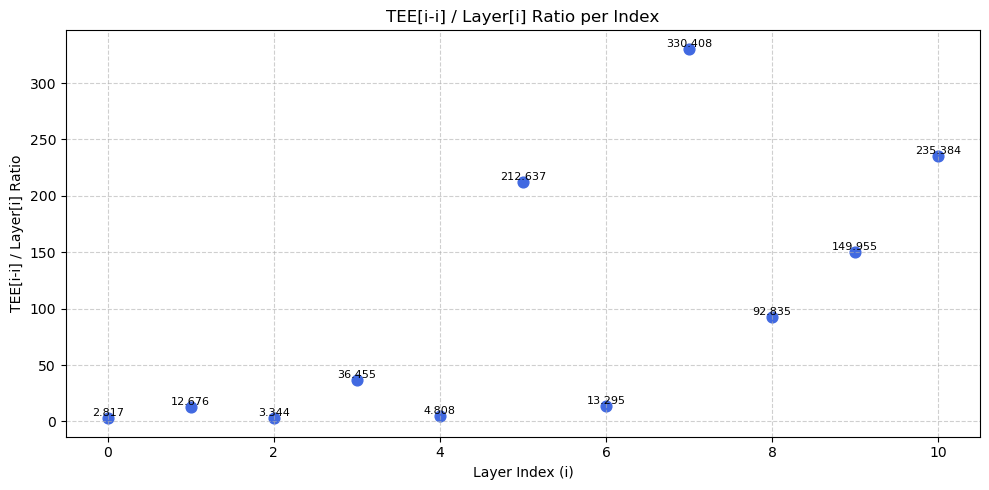

In [13]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# CSV 폴더 경로
csv_dir = "/home/avees/tee/output/layer_time"

sum_dict, count_dict = {}, {}

# 평균 누적
for filename in sorted(os.listdir(csv_dir)):
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(csv_dir, filename))
        numeric_df = df.select_dtypes(include=['number'])

        if "classifier" in numeric_df.columns:
            numeric_df = numeric_df.drop(columns=["classifier"])

        numeric_df = numeric_df[5:]
        col_means = numeric_df.mean()

        for col, val in col_means.items():
            if pd.isna(val):
                continue
            sum_dict[col] = sum_dict.get(col, 0) + val
            count_dict[col] = count_dict.get(col, 0) + 1

# 평균값 계산
final_means = {col: sum_dict[col] / count_dict[col] for col in sum_dict}
result_df = pd.DataFrame(list(final_means.items()), columns=["Label", "Mean"])

# ===============================
#  Layer[i] vs TEE[i-i] 비율 계산
# ===============================
indices = []
ratios = []

for i in range(100):  # 0~99 탐색 (필요시 늘리기)
    layer_label = f"Layer[{i}]"
    tee_label = f"TEE[{i}-{i}]"

    if layer_label in result_df["Label"].values and tee_label in result_df["Label"].values:
        layer_val = result_df.loc[result_df["Label"] == layer_label, "Mean"].values[0]
        tee_val = result_df.loc[result_df["Label"] == tee_label, "Mean"].values[0]

        if layer_val != 0:
            ratio = tee_val / layer_val
            indices.append(i)
            ratios.append(ratio)

# ===============================
#  시각화
# ===============================
if not indices:
    print("❌ 매칭되는 Layer[i] / TEE[i-i] 항목이 없습니다.")
else:
    plt.figure(figsize=(10, 5))
    plt.scatter(indices, ratios, color="royalblue", s=60)

    for x, y in zip(indices, ratios):
        plt.text(x, y, f"{y:.3f}", fontsize=8, ha='center', va='bottom')

    plt.title("TEE[i-i] / Layer[i] Ratio per Index")
    plt.xlabel("Layer Index (i)")
    plt.ylabel("TEE[i-i] / Layer[i] Ratio")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

